## LONG SHORT TERM MEMORY FOR Visa STOCK

In [1]:
# Importing all the required packages and libraries

import math
from math import sqrt
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense, Activation

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#Fetching data for Visa Stock for 5 years

df = web.DataReader('V', data_source='yahoo', start='2014-01-01', end='2020-12-31') 
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,55.507500,54.875000,55.384998,55.252499,10654000.0,52.239883
2014-01-03,55.622501,55.057499,55.437500,55.290001,7809600.0,52.275349
2014-01-06,55.577499,54.897499,55.294998,54.957500,8577600.0,51.960972
2014-01-07,55.527500,55.115002,55.187500,55.377499,8178000.0,52.358078
2014-01-08,55.750000,55.160000,55.355000,55.555000,8487200.0,52.525890
2014-01-09,56.130001,55.415001,55.887501,55.477501,8386400.0,52.452625
2014-01-10,55.685001,55.002499,55.459999,55.282501,6429600.0,52.268246
2014-01-13,56.047501,54.652500,55.505001,54.724998,13554400.0,51.741150
2014-01-14,55.662498,54.582500,54.685001,55.662498,10851600.0,52.627541


In [3]:
print(df.shape)

(1763, 6)


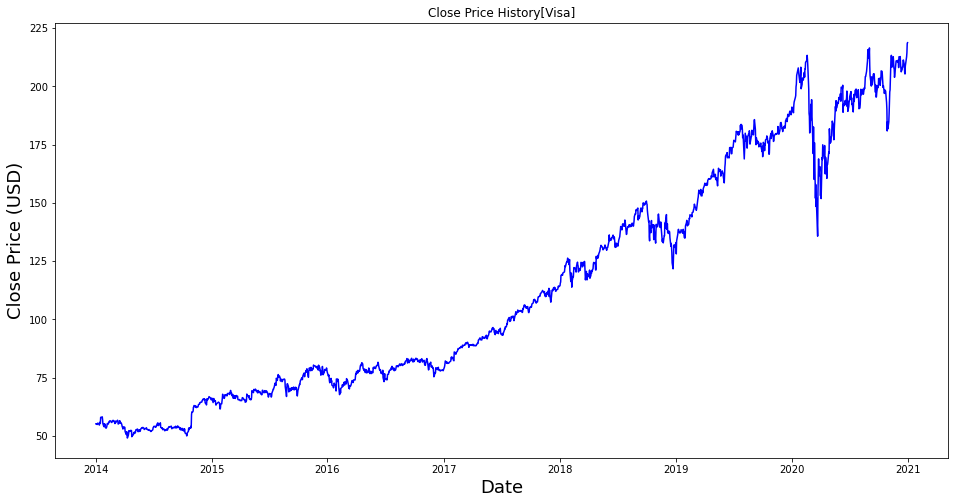

In [4]:
# Visualize the closing price history for Visa stock

plt.figure(figsize=(16,8))
plt.title('Close Price History[Visa]')
plt.plot(df['Close'], color='b')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column.
data = df.filter(['Close'])

# Converting the dataframe to a numpy array.
dataset = data.values

# Compute the number of rows to train the model on.

training_data_len = math.ceil( len(dataset) *.8)

In [6]:
# Min-Max Normalization.
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
# Create the scaled training dataset.
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train data sets
X_train=[]
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
# Convert x_train and y_train to numpy arrays.
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshape the data into the shape accepted by the LSTM.
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [10]:
# Build the LSTM network model.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=25, return_sequences=False))
model.add(Activation('linear'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 25)                7600      
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 18,026
Trainable params: 18,026
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model.
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1351/1351 [==============================] - 10s 5ms/step - loss: 0.0011
Epoch 2/10
1351/1351 [==============================] - 8s 6ms/step - loss: 3.4005e-04
Epoch 3/10
1351/1351 [==============================] - 8s 6ms/step - loss: 2.7083e-04
Epoch 4/10
1351/1351 [==============================] - 8s 6ms/step - loss: 2.7315e-04
Epoch 5/10
1351/1351 [==============================] - 9s 6ms/step - loss: 2.5168e-04
Epoch 6/10
1351/1351 [==============================] - 9s 7ms/step - loss: 1.5033e-04
Epoch 7/10
1351/1351 [==============================] - 9s 6ms/step - loss: 1.6437e-04
Epoch 8/10
1351/1351 [==============================] - 7s 5ms/step - loss: 1.5098e-04
Epoch 9/10
1351/1351 [==============================] - 7s 5ms/step - loss: 1.3765e-04
Epoch 10/10
1351/1351 [==============================] - 7s 5ms/step - loss: 1.5475e-04


In [13]:
# Test dataset.
test_data = scaled_data[training_data_len-60:, :]

# Create the x_test and y_test datasets.
X_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [14]:
# Convert x_test to a numpy array.
X_test = np.array(X_test)

In [15]:
# Reshape the data into the shape accepted by the LSTM.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
# Getting the models predicted price values.
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling

In [17]:
# Calculate/Get the value of RMSE.
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
mse = mean_squared_error(predictions,y_test)
rmse_new = sqrt(mse)
r = r2_score(predictions,y_test)

In [18]:
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)

RMSE = {} 4.348649924507424
R-Squared Score = {} 0.9058916795180617


In [19]:
# Plot/Create the data for the graph.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

RMSE = {} 4.348649924507424
R-Squared Score = {} 0.9058916795180617


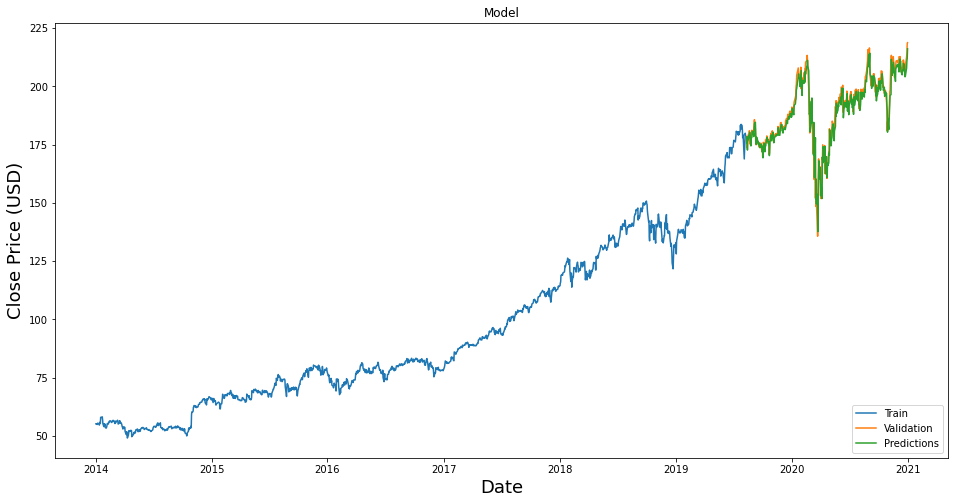

In [20]:
# Visualize the data.
print('RMSE = {}',rmse)
print('R-Squared Score = {}',r)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2019-08-12,176.339996,178.130005
2019-08-13,178.610001,175.646805
2019-08-14,173.509995,178.355316
2019-08-15,176.270004,172.673340
2019-08-16,178.229996,176.398605
...,...,...
2020-12-24,208.699997,204.256790
2020-12-28,212.630005,207.825104
2020-12-29,214.369995,211.031021
